# Prediction using Supervised ML     

* BY: CHAYAN GULATI

#### Simple Linear Regression with Python

Create a model that predict based on the number of hours studied, Scores obtained by the student.
As we have 2 columns both are numerical the best way to solve this problem by using Simple Linear Regression.

The dataset contains the following columns:
* 'Hours' : Number of hours studied
* 'Scores': Scores obtained by students

### Import Libraries

In [94]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

### Check out the dataset

In [95]:
# Reading dataset
data = pd.read_csv('Grip.csv')

In [96]:
# Check the first 5 rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [97]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [98]:
# Describe the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [99]:
# Check the columns
data.columns

Index(['Hours', 'Scores'], dtype='object')

### EDA

Let's create some simple plots to check out the data!

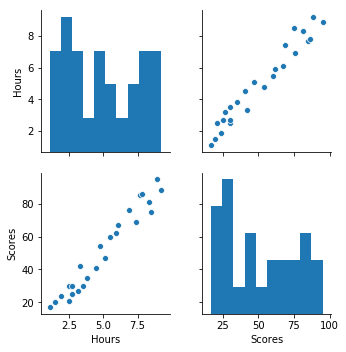

In [100]:
# Pairwise relationship
sns.pairplot(data)

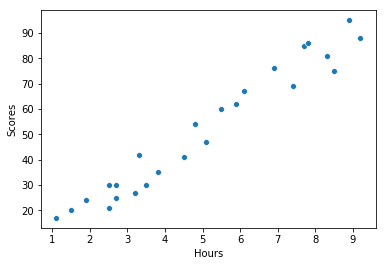

In [101]:
# Scatter plot
sns.scatterplot(x='Hours', y='Scores', data=data)

### Training a Simple Linear Regression Model

In [102]:
# X-independent variable & y-dependent variable
X = data['Hours'].values.reshape(-1,1)
y = data['Scores'].values

### Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [103]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating and Training the Model

In [104]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Model Evaluation

In [105]:
# Intercept
print(lr.intercept_)

2.826892353899737


In [106]:
# Co-efficient
print(lr.coef_)

[9.68207815]


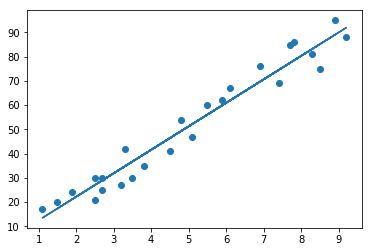

In [107]:
# Plotting the regression line (y = m*x + c)
line = lr.coef_ * X + lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Predictions from Model

Let's grab predictions off our test set and see how well it did!

In [108]:
# Predict on X_test
y_pred = lr.predict(X_test)

In [109]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [110]:
# we can also test with our own data
hours = [[9.25]]
own_pred = lr.predict(hours)
print(f'No. of Hours of study : 9.25')
print(f'Predicted Score : {own_pred[0]}')

No. of Hours of study : 9.25
Predicted Score : 92.38611528261494


### Regression Evaluation Metrics

In [111]:
from sklearn import metrics  
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R2 score: 0.9678055545167994


As R2 score is quite high 96.7% approx i.e., our model is performing well on the dataset.

# Thank You